# Inviscid Taylor-Green vortex

In [2]:
using JLD2, Plots, LaTeXStrings

In [3]:
path = "../results/20231017_tgv_M4_small/"

L = 2π
T = 14.0
n_s = 300
a = 1.0
C_t = 0.005
M = 4

T = 14.0
n_s = 300
s_tensor_lf = []
s_multi_lf = []
t_tensor_lf = []
t_multi_lf = []
p_range = collect(4:8)
for p in p_range
    dt = C_t*(L/M)/(a*p^2)
    n_step = ceil(Int, T/(dt*n_s))
    push!(s_tensor_lf, load_object(string(path,
        "ModalTensor_Tet_FluxDifferencingForm/LaxFriedrichsNumericalFlux/p",p,"/entropy.jld2"))[1:end-1,1])
    push!(t_tensor_lf, [dt*n_step*i for i in 0:(length(last(s_tensor_lf))-1)])
    push!(s_multi_lf, load_object(string(path,
        "ModalMulti_Tet_FluxDifferencingForm/LaxFriedrichsNumericalFlux/p",p,"/entropy.jld2"))[1:end-1,1])
    push!(t_multi_lf, [dt*n_step*i for i in 0:(length(last(s_multi_lf))-1)])
end

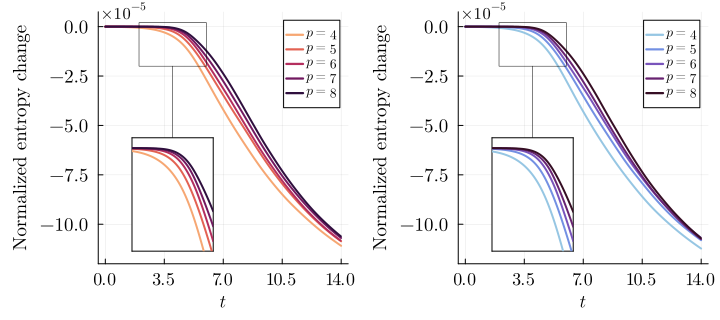

In [4]:
entropy_tensor_fd = plot(windowsize=(350,300), legendfontsize=9,
    fontfamily="Computer Modern", xtickfontsize=12, ytickfontsize=12, 
    xguidefontsize=12, yguidefontsize=12, xlabel=L"$t$", ylabel="Normalized entropy change", 
    ylims=[-12,0.75], xticks=([0,3.5,7,10.5,14], [L"0.0", L"3.5", L"7.0", L"10.5", L"14.0"]))
for i in eachindex(t_tensor_lf)
    plot!(entropy_tensor_fd, t_tensor_lf[i], (s_tensor_lf[i] .- s_tensor_lf[i][1])./abs(s_tensor_lf[i][1])*1e5,
        linewidth=2, label=string(L"$p = $", latexstring(p_range[i])), 
        color=palette(:matter)[ceil(Int,256*i/length(t_tensor_lf))])
end

annotate!(entropy_tensor_fd, (1.2, 0.8, Plots.text(L"\times\, 10^{-5}", 11, :black, :center)))

lens!(entropy_tensor_fd, [2.0,6.0], [-2.0,0.2], inset = (1, bbox(0.135, 0.5, 0.325, 0.45)), 
    subplot=2, xticks=:none, yticks=:none, axes=:none, framestyle = :box, 
    linecolor=:black, linewidth=0.5)

entropy_multi_fd = plot(windowsize=(350,300), legendfontsize=9,
    fontfamily="Computer Modern", xtickfontsize=12, ytickfontsize=12, 
    xguidefontsize=12, yguidefontsize=12, xlabel=L"$t$", ylabel="Normalized entropy change",
    ylims=[-12,0.75], xticks=([0,3.5,7,10.5,14], [L"0.0", L"3.5", L"7.0", L"10.5", L"14.0"]))
for i in eachindex(t_multi_lf)
    plot!(entropy_multi_fd, t_multi_lf[i], (s_multi_lf[i] .- s_multi_lf[i][1])./abs(s_multi_lf[i][1])*1e5, 
        linewidth=2, label=string(L"$p = $", latexstring(p_range[i])), 
        color=palette(:dense)[ceil(Int,256*i/length(t_multi_lf))])
end

annotate!(entropy_multi_fd, (1.2, 0.8, Plots.text(L"\times\, 10^{-5}", 11, :black, :center)))

lens!(entropy_multi_fd, [2.0,6.0], [-2.0,0.2], inset = (1, bbox(0.135, 0.5, 0.325, 0.45)), 
    subplot=2, xticks=:none, yticks=:none, axes=:none, framestyle = :box,
    linecolor=:black, linewidth=0.5)

plot(entropy_tensor_fd, entropy_multi_fd, windowsize=(720,320),
    left_margin=20*Plots.px, bottom_margin=20*Plots.px, fmt=:png)

In [5]:
savefig(entropy_tensor_fd, "../plots/tgv_M01_tet_entropy_tensor_fluxdiff_lf.pdf")
savefig(entropy_multi_fd, "../plots/tgv_M01_tet_entropy_multi_fluxdiff_lf.pdf")

"/Users/tristanmontoya/Research/ReproduceEntropyStableDSEM/plots/tgv_M01_tet_entropy_multi_fluxdiff_lf.pdf"